# Appartment recommender System


This project presents the basis to build a **recomendation model** with potential application on the housing rental market. This recommender system allows the user to know which are the **better options for renting an appartment**. The model only takes the apartments that better fit the user conditions. This is a beta model and just takes care of four variables: **Education access, Safety, Public transportation access and prices**.

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy



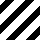
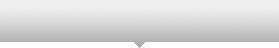
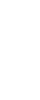
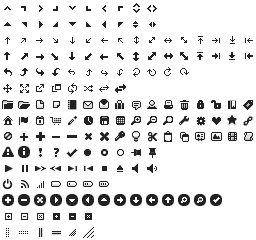
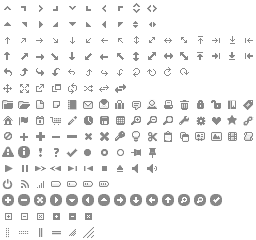
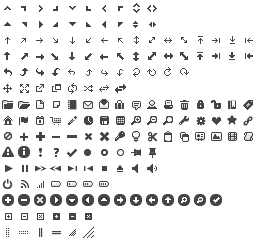
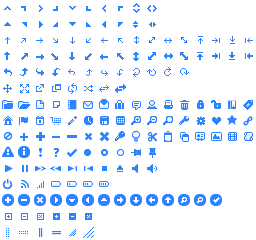
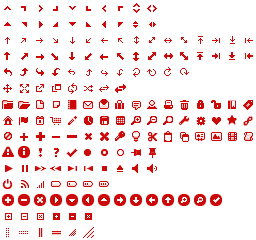
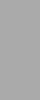
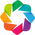
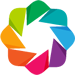
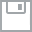
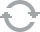
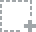
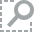
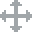
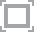
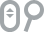

In [1]:
from StringIO import StringIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
#import itertools
#import plotly.plotly as py
#from plotly.graph_objs import *
from pylab import *
%pylab inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
import bokeh.plotting as bkp
import seaborn

##Read and plot the already prepared data

This section puts all the already prepared data together. 

In [3]:
import os
os.getcwd()

'/Users/paudiazgallifa/Documents/Data_Science/SlideRule/CapstoneProject/SlideRule_Capstone_Project'

In [2]:
#read data:

#Positive:

metro_entrances_df= pd.read_csv('/Users/paudiazgallifa/Documents/Data_Science/SlideRule/CapstoneProject/SlideRule_Capstone_Project/metro_data/Metro_entrance_coordinates.csv',sep=',')
Libraries_df=pd.read_csv('/Users/paudiazgallifa/Documents/Data_Science/SlideRule/CapstoneProject/SlideRule_Capstone_Project/libraries/Libraries_coordinates',sep=',')
Bus_stops_df=pd.read_csv('/Users/paudiazgallifa/Documents/Data_Science/SlideRule/CapstoneProject/SlideRule_Capstone_Project/bus_stops/Bus_stops_df.csv', sep=',')
Metro_Bus_stops_df=pd.read_csv('/Users/paudiazgallifa/Documents/Data_Science/SlideRule/CapstoneProject/SlideRule_Capstone_Project/bus_stops/Metro-Bus_stops_df.csv', sep=',')

car_share_loc_df=pd.read_csv('/Users/paudiazgallifa/Documents/Data_Science/SlideRule/CapstoneProject/SlideRule_Capstone_Project/car_sharing/car_share_locations', sep=',')
public_schools_df= pd.read_csv('/Users/paudiazgallifa/Documents/Data_Science/SlideRule/CapstoneProject/SlideRule_Capstone_Project/public_schools/Public_schools_coordinates.csv',sep=',')

#Negative:
Street_crime_coordinates= pd.read_csv('/Users/paudiazgallifa/Documents/Data_Science/SlideRule/CapstoneProject/SlideRule_Capstone_Project/crime_data/Coordinates_crimes.csv', sep=',')


#Apartments
adresses_and_links_df=pd.read_csv('/Users/paudiazgallifa/Documents/Data_Science/SlideRule/CapstoneProject/SlideRule_Capstone_Project/apartment_data/apartments_craigslist.csv',sep=',')

In [13]:
#Metro_Bus_stops_df.head()

In [3]:
import plotly.plotly as py
import plotly.graph_objs as go


trace0 = go.Scatter(
    x=metro_entrances_df['Longitude'],
    y=metro_entrances_df['Latitude'],
    mode='markers',
    marker=dict(size=8,color='red',symbol='m',
                line=dict(width=1)
               ),
    name='Metro Entrances',
    text=metro_entrances_df['Text'],
    )

trace1 = go.Scatter(
    x=Libraries_df['Longitude'],
    y=Libraries_df['Latitude'],
    mode='markers',
    marker=dict(size=8, color='purple',
                line=dict(width=1)
               ),
    name='Libraries',
    text=Libraries_df['Text'],
    )

trace2 = go.Scatter(
    x=Bus_stops_df['Longitude'],
    y=Bus_stops_df['Latitude'],
    mode='markers',
    marker=dict(size=8,color='orange',
                line=dict(width=1)
               ),
    name='Bus stops',
    text=Bus_stops_df['Text'],
    )


trace3 = go.Scatter(
    x=Street_crime_coordinates['Longitude'],
    y=Street_crime_coordinates['Latitude'],
    mode='markers',
    marker=dict(size=8, opacity=0.2, color='black',
                line=dict(width=1)
               ),
    name='Place with reported incidents',
    text=Street_crime_coordinates['mean'],
    )

trace4 = go.Scatter(
    x=public_schools_df['Longitude'],
    y=public_schools_df['Latitude'],
    mode='markers',
    marker=dict(size=8, color='green',
                line=dict(width=1)
               ),
    name='Public Schools',
    text=public_schools_df['Text'],
    )

trace5 = go.Scatter(
    x=car_share_loc_df['Longitude'],
    y=car_share_loc_df['Latitude'],
    mode='markers',
    marker=dict(size=8,color='yellow',
                line=dict(width=1)
               ),
    name='Car share locations',
    text=car_share_loc_df['Text'],
    )

trace6 = go.Scatter(
    x=adresses_and_links_df['Longitude'],
    y=adresses_and_links_df['Latitude'],
    mode='markers',
    marker=dict(size=14,color='blue',symbol='x',
                line=dict(width=1)
               ),
    name='Apartments for rent',
    text=adresses_and_links_df['Price'],
    )

trace7 = go.Scatter(
    x=Bus_stops_df['Longitude'],
    y=Bus_stops_df['Latitude'],
    mode='markers',
    marker=dict(size=8,color='orange',
                line=dict(width=1)
               ),
    name='Metro-Bus stops',
    text=Bus_stops_df['Text'],
    )

data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7]
layout = go.Layout(
    title='Locations DC',
    hovermode='closest',
    xaxis=dict(
        title='Longitude',
        ticklen=5,
        zeroline=False,
        gridwidth=2,
    ),
    yaxis=dict(
        title='Latitude',
        ticklen=5,
        gridwidth=2,
    ),
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='long and lat')

There are **53 apartments** available.

## Machine learning. Unsupervised approach

* ###K-NN preparation data

Data preparation to **KNN algorithm**. Build a list of lists with the longitudes and latitudes for each feature that will be the **SAMPLE**.



In [4]:
def list_builder(dataframe):
    new_list=[]
    for X,Y in zip(dataframe.Longitude, dataframe.Latitude):
        new_list.append([X,Y])
    return new_list

metro_entrances_list = list_builder(metro_entrances_df)
Libraries_list = list_builder(Libraries_df)
Bus_stops_list = list_builder(Bus_stops_df)
Metro_Bus_stops_list = list_builder(Metro_Bus_stops_df)
Street_crime_coordinates_list = list_builder(Street_crime_coordinates)
car_share_loc_list = list_builder(car_share_loc_df)
public_schools_list = list_builder(public_schools_df)

adresses_and_links_list = list_builder(adresses_and_links_df)

* ### KNN algorithm function

The K-NN algorithm allows us to classify the nearest neighbors to each apartment. 
The parameters used are K=1 or 10, D=2 and algorithm in auto mode.
Due to the low value of K and D the best mede is the brute force.

In [5]:
from sklearn.neighbors import NearestNeighbors

def Give_me_the_Nearest_Neighbors(sample_list, k):
    samples=sample_list
    neigh = NearestNeighbors(n_neighbors=k,algorithm='auto')
    neigh.fit(samples)
    return neigh.kneighbors(adresses_and_links_list)

Apts_metro_distances = Give_me_the_Nearest_Neighbors(metro_entrances_list,1)
Apts_libraries_distances = Give_me_the_Nearest_Neighbors(Libraries_list,1)
Apts_Bus_stops_distances = Give_me_the_Nearest_Neighbors(Bus_stops_list,1)
Apts_Metro_Bus_stops_distances = Give_me_the_Nearest_Neighbors(Metro_Bus_stops_list,1)
Apts_crime_distances = Give_me_the_Nearest_Neighbors(Street_crime_coordinates_list,1)
Apts_car_share_distances = Give_me_the_Nearest_Neighbors(car_share_loc_list,1)
Apts_schools_distances = Give_me_the_Nearest_Neighbors(public_schools_list,1)

In [369]:
#Apts_Bus_stops_distances[0]

The KNN gives us an array with a list of lists. We need a simple list for the distances and another for the indexes.

In [6]:
import itertools

def itertools_iterable_flatten(iter_iter):
    '''returns a flat list'''
    return list(itertools.chain.from_iterable(iter_iter))



In each of these variables are the ten nearest neighbors of each apartment. Each variable, such as Apts_metro_distances has two lists inside and each list deals with:

* The first element contains the distances between the apartment and its neighbors. 
* The second list has the indexes of each apartment.

Let's now compute the **safety**, **education** and **transport** indexes.




* ###Build the Transport, Safety, Education and economic indexes.


###Transport index

Here the K-NN algorithm takes the nearest metro entrance, bus stop or car sharing location with respect the spot of the apartment . Thus the apartments are sorted by the shortest distance to any of these public transportation access locations.

In [7]:
def Transport_df_builder():
    ''' This function gives us a list with the apartments sorted by the minimum distance needed 
    to  reach any public transport facility'''
    
    to_metro=[]
    to_metro_index=[]
    
    to_bus=[]
    to_bus_index=[]
    
    to_metro_bus=[]
    to_metro_bus_index=[]
    
    to_car_share=[]
    to_car_share_index=[]
    
    min_distance=[]
    NPT=[] #nearest_public_transportation_access<
    
    for i in range(0,len(adresses_and_links_list)-1):
        to_metro.append(float(Apts_metro_distances[0][i]))
        to_metro_index.append(float(Apts_metro_distances[1][i]))
        
        to_bus.append(float(Apts_Bus_stops_distances[0][i]))
        to_bus_index.append(float(Apts_Bus_stops_distances[1][i]))
        
        to_metro_bus.append(float(Apts_Metro_Bus_stops_distances[0][i])) 
        to_metro_bus_index.append(float(Apts_Metro_Bus_stops_distances[1][i]))
        
        to_car_share.append(float(Apts_car_share_distances[0][i]))
        to_car_share_index.append(float(Apts_car_share_distances[1][i]))
        
        new_dict={'to_metro_index':float(Apts_metro_distances[0][i]),
                  'to_bus_index':float(Apts_Bus_stops_distances[0][i]),
                  'to_metro_bus_index':float(Apts_Metro_Bus_stops_distances[0][i]),
                  'to_car_share_index':float(Apts_car_share_distances[0][i])}
                  
        min_distance.append(min(new_dict.items(), key=lambda x: x[1])[1])
        NPT.append(min(new_dict.items(), key=lambda x: x[1])[0])
    
    
    transport_Df=pd.DataFrame({'to_metro':to_metro,'to_metro_index':to_metro_index,
                               'to_bus':to_bus,'to_bus_index':to_bus_index,
                               'to_metro_bus':to_metro_bus,'to_metro_bus_index':to_metro_bus_index,
                               'to_car_share':to_car_share,'to_car_share_index':to_car_share_index,
                               'min_distance':min_distance, 'NPT': NPT})  
        
    return transport_Df
        
transport_df=Transport_df_builder() 

In [8]:
transport_df.sort(columns='min_distance',ascending=True).head(10)


,NPT,min_distance,to_bus,to_bus_index,to_car_share,to_car_share_index,to_metro,to_metro_bus,to_metro_bus_index,to_metro_index
5,to_metro_bus_index,0.000087,0.038074,14,0.011264,18,0.011519,0.000087,1750,58
23,to_metro_index,0.000171,0.011714,26,0.004778,79,0.000171,0.000564,9511,85
29,to_metro_bus_index,0.000184,0.038739,14,0.002671,17,0.003666,0.000184,3282,23
48,to_metro_index,0.000203,0.044098,114,0.010905,68,0.000203,0.000252,8417,37
11,to_metro_bus_index,0.000242,0.018754,52,0.004504,15,0.015442,0.000242,5319,53
44,to_metro_bus_index,0.000379,0.070749,14,0.034028,18,0.032748,0.000379,4095,3
4,to_bus_index,0.000447,0.000447,20,0.006234,6,0.006696,0.000458,5098,33
42,to_metro_bus_index,0.000481,0.013179,103,0.013861,43,0.003450,0.000481,3710,15
16,to_metro_bus_index,0.000538,0.008438,13,0.012174,1,0.013967,0.000538,3444,65
31,to_metro_bus_index,0.000561,0.033016,41,0.007705,75,0.009827,0.000561,2544,84


The first column of the hereabove shown dataframe displays which is the nearest access point to a public transportation service. The apartment 5 is the one with the lowest distance to a public transportation service, in this case a metro entrance.


* **Let's define the score of each apartment based on a range from 0 to 5 stars:**
    To do it properly, the features (the indexes) must be scaled. I use the **MinMaxScaler** library from scikit-learn.org. That function takes the max() distance value as the lowest star based score and the min() distance as the highest punctuation.

In [10]:
from sklearn.preprocessing import MinMaxScaler

def get_punctuation(dataframe,features_to_rescale):
    scaler = MinMaxScaler()
    #dataframe['Total_Distance']=dataframe.total_distance 
    
    dataframe['Stars']=(float(5.0)-(scaler.fit_transform(features_to_rescale)*5))
    
    return dataframe


transport_df= get_punctuation(transport_df,transport_df.min_distance)
transport_df.sort(columns='Stars',ascending=False).head(10)

,NPT,min_distance,to_bus,to_bus_index,to_car_share,to_car_share_index,to_metro,to_metro_bus,to_metro_bus_index,to_metro_index,Stars
5,to_metro_bus_index,0.000000,0.038074,14,0.011264,18,0.011519,0.000087,1750,58,5.000000
23,to_metro_index,0.021190,0.011714,26,0.004778,79,0.000171,0.000564,9511,85,4.894052
29,to_metro_bus_index,0.024480,0.038739,14,0.002671,17,0.003666,0.000184,3282,23,4.877598
48,to_metro_index,0.029097,0.044098,114,0.010905,68,0.000203,0.000252,8417,37,4.854514
11,to_metro_bus_index,0.038939,0.018754,52,0.004504,15,0.015442,0.000242,5319,53,4.805307
44,to_metro_bus_index,0.073325,0.070749,14,0.034028,18,0.032748,0.000379,4095,3,4.633373
4,to_bus_index,0.090359,0.000447,20,0.006234,6,0.006696,0.000458,5098,33,4.548203
42,to_metro_bus_index,0.098928,0.013179,103,0.013861,43,0.003450,0.000481,3710,15,4.505361
16,to_metro_bus_index,0.113315,0.008438,13,0.012174,1,0.013967,0.000538,3444,65,4.433425
31,to_metro_bus_index,0.119103,0.033016,41,0.007705,75,0.009827,0.000561,2544,84,4.404486


The Top10 apartments for the **TRANSPORT INDEX** are these above shown. 



### Education index

The education index will be implemented by two factors:

* Proximity to school in function of the child age (Elementary, Middle or High School) or if Youth engagement is needed.
* Distance to the closest library 

To simplify the process it is assumed that the user needs an apartment close to an Elemental School and to a library.

* **Assumption taken**: The user is only interested in **Elemental School** and **libraries**.

In [11]:
public_schools_df.drop('Unnamed: 0',1)


# school classification per age
H_schools = public_schools_df[public_schools_df.FACUSE== 'High School']
E_schools = public_schools_df[public_schools_df.FACUSE== 'Elementary School']
M_schools = public_schools_df[public_schools_df.FACUSE== 'Middle School']
YE_schools = public_schools_df[public_schools_df.FACUSE== 'Youth Engagement']

#prepare data to KNN, build the lists
H_schools_list = list_builder(H_schools)
E_schools_list = list_builder(E_schools)
M_schools_list = list_builder(M_schools)
YE_schools_list = list_builder(YE_schools)

# use the lists to compute KNN algorithm and obtain distances and indexes (array). Then transform the arrays into lists.
Apt_H_dist_list = itertools_iterable_flatten(Give_me_the_Nearest_Neighbors(H_schools_list, 1)[0])
Apt_H_index_list = itertools_iterable_flatten(Give_me_the_Nearest_Neighbors(H_schools_list, 1)[1])
Apts_E_dist_list = itertools_iterable_flatten(Give_me_the_Nearest_Neighbors(E_schools_list, 1)[0])
Apts_E_index_list = itertools_iterable_flatten(Give_me_the_Nearest_Neighbors(E_schools_list, 1)[1])
Apts_M_dist_list = itertools_iterable_flatten(Give_me_the_Nearest_Neighbors(M_schools_list, 1)[0])
Apts_M_index_list = itertools_iterable_flatten(Give_me_the_Nearest_Neighbors(M_schools_list, 1)[1])
Apts_YE_dist_list = itertools_iterable_flatten(Give_me_the_Nearest_Neighbors(YE_schools_list, 1)[0])
Apts_YE_index_list = itertools_iterable_flatten(Give_me_the_Nearest_Neighbors(YE_schools_list, 1)[1])


# The same proccess for the libraries
libraries_list = list_builder(Libraries_df)
Apt_lib_dist_list = itertools_iterable_flatten(Give_me_the_Nearest_Neighbors(libraries_list, 1)[0])
Apt_lib_index_list = itertools_iterable_flatten(Give_me_the_Nearest_Neighbors(libraries_list, 1)[1])

# Build a dataframe with all the distances and indexes
Education_access_df=pd.DataFrame({'Apt_H_dist_list':Apt_H_dist_list,'Apt_H_index_list':Apt_H_index_list,
                                 'Apts_E_dist_list':Apts_E_dist_list, 'Apts_E_index_list':Apts_E_index_list,
                                 'Apts_M_dist_list':Apts_M_dist_list, 'Apts_M_index_list':Apts_M_index_list,
                                 'Apts_YE_dist_list':Apts_YE_dist_list, 'Apts_YE_index_list':Apts_YE_index_list,
                                 'Apt_lib_dist_list':Apt_lib_dist_list, 'Apt_lib_index_list':Apt_lib_index_list})


In [12]:
Education_access_df.head()

,Apt_H_dist_list,Apt_H_index_list,Apt_lib_dist_list,Apt_lib_index_list,Apts_E_dist_list,Apts_E_index_list,Apts_M_dist_list,Apts_M_index_list,Apts_YE_dist_list,Apts_YE_index_list
0,0.015303,1,0.014272,22,0.003517,39,0.003301,9,0.026966,3
1,0.017175,1,0.014577,22,0.005901,39,0.012598,9,0.025070,3
2,0.006299,6,0.009662,21,0.002818,29,0.005293,4,0.006299,4
3,0.014911,7,0.018143,24,0.004823,58,0.004171,11,0.006711,5
4,0.013680,8,0.006721,16,0.004150,43,0.015645,6,0.018951,0


Now is time to rate them by stars: 

In [13]:
# Take the right columns
ES_LIB_education_access=Education_access_df[['Apt_lib_dist_list','Apt_lib_index_list',
                                             'Apts_E_dist_list','Apts_E_index_list']]
# Add the sum column
ES_LIB_education_access['Distance']=(ES_LIB_education_access.Apt_lib_dist_list)+(ES_LIB_education_access.Apts_E_dist_list)

# Add the 5star score to the dataframe
Education_df=get_punctuation(ES_LIB_education_access,ES_LIB_education_access.Distance)
Education_df.sort(columns='Stars',ascending=False).head(10)

/Users/paudiazgallifa/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/paudiazgallifa/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Apt_lib_dist_list,Apt_lib_index_list,Apts_E_dist_list,Apts_E_index_list,Distance,Stars
28,0.001277,4,0.001496,51,0.000000,5.000000
7,0.003371,0,0.001436,24,0.029911,4.850446
52,0.002805,16,0.003457,43,0.051317,4.743414
39,0.003810,2,0.003360,64,0.064679,4.676604
40,0.003810,2,0.003360,64,0.064679,4.676604
23,0.005131,2,0.002142,64,0.066179,4.669103
8,0.003101,0,0.004693,24,0.073843,4.630786
50,0.005765,4,0.002227,26,0.076765,4.616173
29,0.001992,6,0.006326,15,0.081563,4.592185
21,0.006935,16,0.001879,43,0.088858,4.555712


See hereabove the Top10 apartments concerning the **EDUCATION INDEX**. As was set before, the system just computed euclidean distaces to **elemental schools** and **libraries**. The minimun distance is the one at the top of the list (apartment 28). 



## Safety index

The safety index tells us how safe is the place where the apartment is located. 

The safety index works a bit different than the others. 
Here, the total number of crimes registered in the ten nearest neighbors is recorded with the aim of rating each apartment with the before used star models. The main difference here is therefore that the K-NN uses 10 neighbors instead of 1. Now K is equal to ten.


* **K = 10**

In [16]:
#prepare data to KNN, build the lists
Crime_list = list_builder(Street_crime_coordinates)

# use the lists to compute KNN algorithm to obtain the indexes (array), we don't care about the distances 
# because the point here is the sum of the mean numbers of incidents close to each apartment. 

crime_indexes=Give_me_the_Nearest_Neighbors(Crime_list, 10)[1]
sumas=[] #container for the sum of the ten nearest neighbors to each apartment

for apartment_location in crime_indexes:
    suma=0
    for crime_index in apartment_location:
        suma+=Street_crime_coordinates.ix[crime_index]['mean']
    sumas.append(suma)   

safety_df=pd.DataFrame({'sumas':sumas})
    
    
safety_df=get_punctuation(safety_df,safety_df.sumas)

# Build a dataframe with all the distances and indexes
safety_df.sort(columns='Stars',ascending=False).head(10)

,sumas,Stars
7,0.000000,5.000000
6,0.026531,4.867347
44,0.032653,4.836735
8,0.053061,4.734694
38,0.079592,4.602041
12,0.079592,4.602041
24,0.108163,4.459184
0,0.114286,4.428571
37,0.124490,4.377551
49,0.140816,4.295918


There it goes!!!!! top10 safest apartments in DC.

### Economic Index

Time to check the prices of each apartment. This index just scales the prices to make the results more visual and not bias the opinion of the user. 5 stars will be the lowest price, 0 starts the hightest price and so on.

In [17]:
price_df = adresses_and_links_df[['Price']]

In [18]:
price2=[]
for i in price_df.Price:
    price2.append(float(i))
    
price2_df=pd.DataFrame({'price2':price2})

Price_index=get_punctuation(price2_df,price2_df.price2)
Price_index.sort(columns='Stars',ascending=False).head(10)


,price2,Stars
25,0.000000,5.000000
1,0.023729,4.881356
5,0.084746,4.576271
20,0.172881,4.135593
2,0.186441,4.067797
22,0.200000,4.000000
29,0.236610,3.816949
26,0.240678,3.796610
33,0.288136,3.559322
35,0.288136,3.559322



### ALL TOGETHER
Let's build the final dataframe with all four indexes and links for each apartment.

In [22]:
Final_DF=pd.DataFrame({'Apartment_link':adresses_and_links_df.adress_link , 'Transport Index': transport_df.Stars,
                       'Education Index':Education_df.Stars,'Safety Index':safety_df.Stars, 
                       'Price Index':Price_index.Stars, 
                       'Longitude':adresses_and_links_df.Longitude, 'Latitude':adresses_and_links_df.Latitude})

In [23]:
Final_DF.head()

,Apartment_link,Education Index,Latitude,Longitude,Price Index,Safety Index,Transport Index
0,https://washingtondc.craigslist.org/doc/apa/53...,3.895604,38.915020,-77.041999,0.338983,4.428571,2.062604
1,https://washingtondc.craigslist.org/doc/apa/53...,3.697815,38.907192,-77.036871,4.881356,3.214286,4.121468
2,https://washingtondc.craigslist.org/doc/apa/53...,4.286084,38.833181,-76.999872,4.067797,3.193878,3.556593
3,https://washingtondc.craigslist.org/doc/apa/53...,3.514784,38.919339,-77.003463,0.000000,2.826531,3.800667
4,https://washingtondc.craigslist.org/doc/apa/53...,4.404386,38.877699,-76.994442,1.864407,4.081633,4.548203


To make the recommender model a bit more subjective is going to be uses a weighted sum. To do that, the user has to indicate the degree of interest in each Index:I don't care, Low, Medium or High.


In [24]:
def Get_weights(index):
    weight = int(raw_input("How much do you care about " + index + "? (1) I don't care / (2) Low / (3) Medium / (4) High: "))
    if weight in (1,2,3,4):
        return int(weight)
    else:
        print 'Hey, pick a number from 1 to 4'
        return Get_weights(index)

def build_the_final_DF():
      
    weigh_dict={'Education_weight':Get_weights("Education_index"),'Safety_weight':Get_weights("Safety_index"),
            'Transport_weight':Get_weights("Transport_index"),'Price_weight':Get_weights("Price_index")}
    max_score=(5.*weigh_dict['Education_weight'])+(5.*weigh_dict['Safety_weight'])+(5.*weigh_dict['Transport_weight'])+(5.*weigh_dict['Price_weight'])

    Final_DF['Apt Score']= (Final_DF['Education Index']*weigh_dict['Education_weight'])+(Final_DF['Safety Index']*weigh_dict['Safety_weight'])+(Final_DF['Transport Index']*weigh_dict['Transport_weight'])+(Final_DF['Price Index']*weigh_dict['Price_weight'])
    Final_DF['5_STAR_CLASSIFICATION']= (Final_DF['Apt Score']/max_score)*5
    
    return Final_DF.sort(columns='Apt Score',ascending=False)


When weights are all the the same:

In [25]:
equally_weighted=build_the_final_DF()

How much do you care about Education_index? (1) I don't care / (2) Low / (3) Medium / (4) High: 1
How much do you care about Safety_index? (1) I don't care / (2) Low / (3) Medium / (4) High: 1
How much do you care about Transport_index? (1) I don't care / (2) Low / (3) Medium / (4) High: 1
How much do you care about Price_index? (1) I don't care / (2) Low / (3) Medium / (4) High: 1


In [26]:
equally_weighted.head(10)


,Apartment_link,Education Index,Latitude,Longitude,Price Index,Safety Index,Transport Index,Apt Score,5_STAR_CLASSIFICATION
5,https://washingtondc.craigslist.org/doc/apa/53...,4.077455,38.880100,-76.932303,4.576271,3.663265,5.000000,17.316992,4.329248
25,https://washingtondc.craigslist.org/doc/apa/53...,3.910323,38.844595,-76.993884,5.000000,3.897959,4.138552,16.946834,4.236708
11,https://washingtondc.craigslist.org/doc/apa/53...,4.324883,38.900936,-76.985929,2.881356,4.132653,4.805307,16.144199,4.036050
1,https://washingtondc.craigslist.org/doc/apa/53...,3.697815,38.907192,-77.036871,4.881356,3.214286,4.121468,15.914925,3.978731
32,https://washingtondc.craigslist.org/doc/apa/53...,3.751421,38.913821,-77.001558,3.559322,3.959184,4.224256,15.494182,3.873546
35,https://washingtondc.craigslist.org/doc/apa/53...,3.751421,38.913821,-77.001558,3.559322,3.959184,4.224256,15.494182,3.873546
36,https://washingtondc.craigslist.org/doc/apa/53...,3.751421,38.913821,-77.001558,3.559322,3.959184,4.224256,15.494182,3.873546
33,https://washingtondc.craigslist.org/doc/apa/53...,3.751421,38.913821,-77.001558,3.559322,3.959184,4.224256,15.494182,3.873546
16,https://washingtondc.craigslist.org/doc/apa/53...,4.365987,38.857296,-76.980463,3.050847,3.581633,4.433425,15.431892,3.857973
20,https://washingtondc.craigslist.org/doc/apa/53...,4.384317,38.836787,-77.002107,4.135593,3.612245,3.102428,15.234583,3.808646


#Let's simulate 3 scenarios:

* **SCENARIO 1 ** A couple with a car and a child are moving to DC. They do not care about public transportation but are very interested in finding an apartment as safe as possible and with a school not very far. Since they are going to work for a renown company as data scientists and have a high salary, they really don't care too much about the rent. 
 
 * Education_index = 3
 * Safety_index = 4
 * Transport_index = 1
 * Price_index = 1
 
 
* **SCENARIO 2 ** A family of 3 where dad and mom are ninjas. They don't care about safety but they do a lot about price (ninjas are not well paid in DC) and notably about transportation. Their interest in education is also remarkable as they think that their son is weak and will not follow the family business.
 
 * Education_index = 3
 * Safety_index = 1
 * Transport_index = 3
 * Price_index = 4

* **SCENARIO 3 ** A family with a daughter moves to DC. They strongly support the use of public transportation to prevent the well-known global warming. To be consequent with their convictions, they would like to find an apartment as close as possible from their child's school and they want to pay a reasonable amount of money.

 * Education_index = 3
 * Safety_index = 1
 * Transport_index = 4
 * Price_index = 4


##SCENARIO 1

In [27]:
scenario1_df=build_the_final_DF()

How much do you care about Education_index? (1) I don't care / (2) Low / (3) Medium / (4) High: 3
How much do you care about Safety_index? (1) I don't care / (2) Low / (3) Medium / (4) High: 4
How much do you care about Transport_index? (1) I don't care / (2) Low / (3) Medium / (4) High: 1
How much do you care about Price_index? (1) I don't care / (2) Low / (3) Medium / (4) High: 1


In [28]:
scenario1_top10 = scenario1_df.sort(columns='5_STAR_CLASSIFICATION', ascending=False).head(10)
scenario1_top10

,Apartment_link,Education Index,Latitude,Longitude,Price Index,Safety Index,Transport Index,Apt Score,5_STAR_CLASSIFICATION
7,https://washingtondc.craigslist.org/doc/apa/53...,4.850446,38.896117,-76.982214,1.694915,5.000000,3.375363,39.621615,4.402402
28,https://washingtondc.craigslist.org/doc/apa/53...,5.000000,38.913649,-77.022694,1.711864,4.255102,4.013154,37.745427,4.193936
11,https://washingtondc.craigslist.org/doc/apa/53...,4.324883,38.900936,-76.985929,2.881356,4.132653,4.805307,37.191924,4.132436
5,https://washingtondc.craigslist.org/doc/apa/53...,4.077455,38.880100,-76.932303,4.576271,3.663265,5.000000,36.461697,4.051300
25,https://washingtondc.craigslist.org/doc/apa/53...,3.910323,38.844595,-76.993884,5.000000,3.897959,4.138552,36.461358,4.051262
8,https://washingtondc.craigslist.org/doc/apa/53...,4.630786,38.894778,-76.978996,0.016949,4.734694,3.434092,36.282175,4.031353
4,https://washingtondc.craigslist.org/doc/apa/53...,4.404386,38.877699,-76.994442,1.864407,4.081633,4.548203,35.952300,3.994700
6,https://washingtondc.craigslist.org/doc/apa/53...,3.252116,38.926488,-76.998428,2.464407,4.867347,3.920564,35.610708,3.956745
16,https://washingtondc.craigslist.org/doc/apa/53...,4.365987,38.857296,-76.980463,3.050847,3.581633,4.433425,34.908763,3.878751
42,https://washingtondc.craigslist.org/doc/apa/53...,4.534207,38.914906,-77.018257,0.694915,4.020408,4.505361,34.884529,3.876059


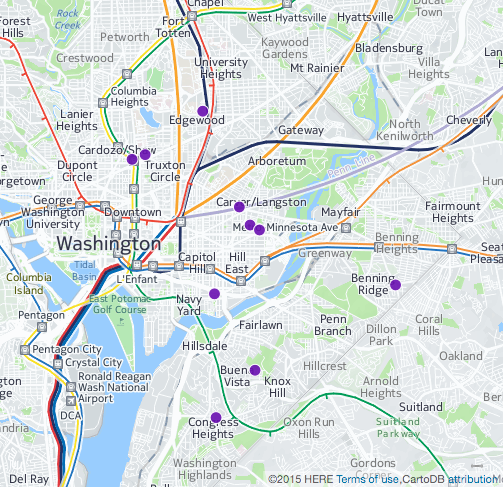

In [39]:
scenario1_top10.to_csv('scenario_1.csv', sep=',')

from IPython.display import Image
Image(filename='scenario_1_map.png') 

In [31]:
print 'Top10: '
count=0
for link in scenario1_df.sort(columns='5_STAR_CLASSIFICATION', ascending=False).head(10).Apartment_link:
    count+=1
    print '#:',count,' --> ',link

Top10: 
#: 1  -->  https://washingtondc.craigslist.org/doc/apa/5332200228.html
#: 2  -->  https://washingtondc.craigslist.org/doc/apa/5331939326.html
#: 3  -->  https://washingtondc.craigslist.org/doc/apa/5332153114.html
#: 4  -->  https://washingtondc.craigslist.org/doc/apa/5309037585.html
#: 5  -->  https://washingtondc.craigslist.org/doc/apa/5307285254.html
#: 6  -->  https://washingtondc.craigslist.org/doc/apa/5324203181.html
#: 7  -->  https://washingtondc.craigslist.org/doc/apa/5332251171.html
#: 8  -->  https://washingtondc.craigslist.org/doc/apa/5332178633.html
#: 9  -->  https://washingtondc.craigslist.org/doc/apa/5332126696.html
#: 10  -->  https://washingtondc.craigslist.org/doc/apa/5310695476.html


##SCENARIO 2

In [32]:
scenario2_df=build_the_final_DF()

How much do you care about Education_index? (1) I don't care / (2) Low / (3) Medium / (4) High: 3
How much do you care about Safety_index? (1) I don't care / (2) Low / (3) Medium / (4) High: 1
How much do you care about Transport_index? (1) I don't care / (2) Low / (3) Medium / (4) High: 3
How much do you care about Price_index? (1) I don't care / (2) Low / (3) Medium / (4) High: 4


In [33]:
scenario2_top10=scenario2_df.sort(columns='5_STAR_CLASSIFICATION', ascending=False).head(10)
scenario2_top10

,Apartment_link,Education Index,Latitude,Longitude,Price Index,Safety Index,Transport Index,Apt Score,5_STAR_CLASSIFICATION
5,https://washingtondc.craigslist.org/doc/apa/53...,4.077455,38.880100,-76.932303,4.576271,3.663265,5.000000,49.200715,4.472792
25,https://washingtondc.craigslist.org/doc/apa/53...,3.910323,38.844595,-76.993884,5.000000,3.897959,4.138552,48.044584,4.367689
1,https://washingtondc.craigslist.org/doc/apa/53...,3.697815,38.907192,-77.036871,4.881356,3.214286,4.121468,46.197558,4.199778
29,https://washingtondc.craigslist.org/doc/apa/53...,4.592185,38.895812,-76.948927,3.816949,1.530612,4.877598,45.207758,4.109796
11,https://washingtondc.craigslist.org/doc/apa/53...,4.324883,38.900936,-76.985929,2.881356,4.132653,4.805307,43.048647,3.913513
2,https://washingtondc.craigslist.org/doc/apa/53...,4.286084,38.833181,-76.999872,4.067797,3.193878,3.556593,42.993097,3.908463
22,https://washingtondc.craigslist.org/doc/apa/53...,3.697815,38.907192,-77.036871,4.000000,3.214286,4.121468,42.672135,3.879285
20,https://washingtondc.craigslist.org/doc/apa/53...,4.384317,38.836787,-77.002107,4.135593,3.612245,3.102428,42.614853,3.874078
16,https://washingtondc.craigslist.org/doc/apa/53...,4.365987,38.857296,-76.980463,3.050847,3.581633,4.433425,42.183257,3.834842
36,https://washingtondc.craigslist.org/doc/apa/53...,3.751421,38.913821,-77.001558,3.559322,3.959184,4.224256,42.123501,3.829409


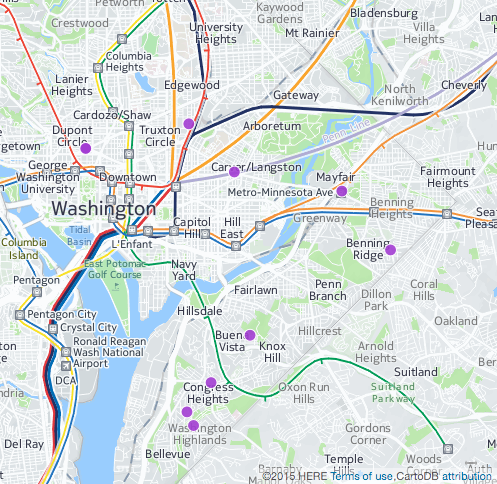

In [40]:
scenario2_top10.to_csv('scenario_2.csv', sep=',')

from IPython.display import Image
Image(filename='scenario_2_map.png') 



In [67]:
print 'Top10: '
count=0
for link in scenario2_df.sort(columns='5_STAR_CLASSIFICATION', ascending=False).head(10).Apartment_link:
    count+=1
    print '#:',count,' --> ',link

Top10: 
#: 1  -->  https://washingtondc.craigslist.org/doc/apa/5309037585.html
#: 2  -->  https://washingtondc.craigslist.org/doc/apa/5307285254.html
#: 3  -->  https://washingtondc.craigslist.org/doc/apa/5332293238.html
#: 4  -->  https://washingtondc.craigslist.org/doc/apa/5331931953.html
#: 5  -->  https://washingtondc.craigslist.org/doc/apa/5332153114.html
#: 6  -->  https://washingtondc.craigslist.org/doc/apa/5332268061.html
#: 7  -->  https://washingtondc.craigslist.org/doc/apa/5332060495.html
#: 8  -->  https://washingtondc.craigslist.org/doc/apa/5332019391.html
#: 9  -->  https://washingtondc.craigslist.org/doc/apa/5332126696.html
#: 10  -->  https://washingtondc.craigslist.org/doc/apa/5331917759.html


##SCENARIO 3

In [35]:
scenario3_df=build_the_final_DF()

How much do you care about Education_index? (1) I don't care / (2) Low / (3) Medium / (4) High: 3
How much do you care about Safety_index? (1) I don't care / (2) Low / (3) Medium / (4) High: 1
How much do you care about Transport_index? (1) I don't care / (2) Low / (3) Medium / (4) High: 4
How much do you care about Price_index? (1) I don't care / (2) Low / (3) Medium / (4) High: 4


In [37]:
scenario3_top10=scenario3_df.sort(columns='5_STAR_CLASSIFICATION', ascending=False).head(10)
scenario3_top10

,Apartment_link,Education Index,Latitude,Longitude,Price Index,Safety Index,Transport Index,Apt Score,5_STAR_CLASSIFICATION
5,https://washingtondc.craigslist.org/doc/apa/53...,4.077455,38.880100,-76.932303,4.576271,3.663265,5.000000,54.200715,4.516726
25,https://washingtondc.craigslist.org/doc/apa/53...,3.910323,38.844595,-76.993884,5.000000,3.897959,4.138552,52.183135,4.348595
1,https://washingtondc.craigslist.org/doc/apa/53...,3.697815,38.907192,-77.036871,4.881356,3.214286,4.121468,50.319027,4.193252
29,https://washingtondc.craigslist.org/doc/apa/53...,4.592185,38.895812,-76.948927,3.816949,1.530612,4.877598,50.085356,4.173780
11,https://washingtondc.craigslist.org/doc/apa/53...,4.324883,38.900936,-76.985929,2.881356,4.132653,4.805307,47.853954,3.987829
22,https://washingtondc.craigslist.org/doc/apa/53...,3.697815,38.907192,-77.036871,4.000000,3.214286,4.121468,46.793603,3.899467
16,https://washingtondc.craigslist.org/doc/apa/53...,4.365987,38.857296,-76.980463,3.050847,3.581633,4.433425,46.616682,3.884723
2,https://washingtondc.craigslist.org/doc/apa/53...,4.286084,38.833181,-76.999872,4.067797,3.193878,3.556593,46.549690,3.879141
36,https://washingtondc.craigslist.org/doc/apa/53...,3.751421,38.913821,-77.001558,3.559322,3.959184,4.224256,46.347756,3.862313
35,https://washingtondc.craigslist.org/doc/apa/53...,3.751421,38.913821,-77.001558,3.559322,3.959184,4.224256,46.347756,3.862313


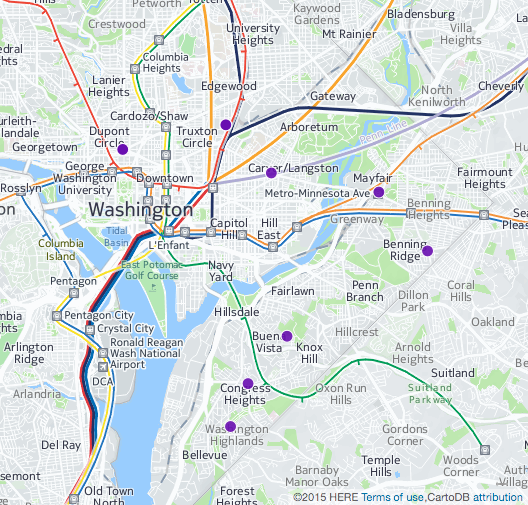

In [41]:
scenario3_top10.to_csv('scenario_3.csv', sep=',')

from IPython.display import Image
Image(filename='scenario_3_map.png')

In [167]:
print 'Top10: '
count=0
for link in scenario3_df.sort(columns='5_STAR_CLASSIFICATION', ascending=False).head(10).Apartment_link:
    count+=1
    print '#:',count,' --> ',link

Top10: 
#: 1  -->  https://washingtondc.craigslist.org/doc/apa/5307285254.html
#: 2  -->  https://washingtondc.craigslist.org/doc/apa/5309037585.html
#: 3  -->  https://washingtondc.craigslist.org/doc/apa/5303308288.html
#: 4  -->  https://washingtondc.craigslist.org/doc/apa/5311057296.html
#: 5  -->  https://washingtondc.craigslist.org/doc/apa/5320988312.html
#: 6  -->  https://washingtondc.craigslist.org/doc/apa/5320777168.html
#: 7  -->  https://washingtondc.craigslist.org/doc/apa/5320701835.html
#: 8  -->  https://washingtondc.craigslist.org/doc/apa/5301405712.html
#: 9  -->  https://washingtondc.craigslist.org/doc/apa/5321368306.html
#: 10  -->  https://washingtondc.craigslist.org/doc/apa/5321344298.html
